In [1]:
from h5py.h5i import DATASET
from sympy.physics.secondquant import InnerProduct
%load_ext autoreload
%autoreload 2


import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import keras
import numpy as np
from graph import *
from encoder import create_encoder


from data_processing import processer
import tensorflow_gnn as tfgnn
from tensorflow_gnn.keras.layers import GraphUpdate, SimpleConv

from RepresentationLearner import RepresentationLearner
from compute import *
from GNN import *
import matplotlib.pyplot as plt

2025-05-20 09:46:30.809068: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-20 09:46:31.077049: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747730791.167206    2452 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747730791.191686    2452 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747730791.421521    2452 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:

num_classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [3]:
x_data = np.concatenate([x_train, x_test])
y_data = np.concatenate([y_train, y_test])

classes = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
]

In [4]:
x_data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
target_size = 32
representation_dims = 512
projection_units = 128
num_clusters = 28
kn = 5
tune_encoder_during_clustering = False

In [6]:
x_data = x_data.astype('float32')
processer.layers[-1].adapt(x_data)
x_data

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [7]:
encoder = create_encoder(representation_dims)
representation_leaner = RepresentationLearner(
    encoder, projection_units, num_augmentations=2, temperature=0.1
)

lr_scheduler = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.001, decay_steps=500, alpha=0.1
)



In [8]:
representation_leaner.compile(
    optimizer=keras.optimizers.AdamW(
        learning_rate=lr_scheduler, weight_decay=0.0001
    ), jit_compile=False
)


In [9]:
history = representation_leaner.fit(
    x=x_data,
    batch_size=512,
    epochs=50
)

Epoch 1/50


I0000 00:00:1747730814.159587    2687 cuda_dnn.cc:529] Loaded cuDNN version 90501
2025-05-20 09:46:58.602548: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-20 09:46:58.602619: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-20 09:46:58.602631: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if m

118/118 ━━━━━━━━━━━━━━━━━━━━ 58s 286ms/step - loss: 113.0464
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 28s 237ms/step - loss: 12.3710
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 32s 269ms/step - loss: 11.4204
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 31s 263ms/step - loss: 11.1064
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 31s 264ms/step - loss: 10.9790
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 31s 265ms/step - loss: 10.8808
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 32s 273ms/step - loss: 10.7882
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 32s 272ms/step - loss: 10.6905
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 32s 269ms/step - loss: 10.5806
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 28s 241ms/step - loss: 10.4635
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 32s 271ms/step - loss: 10.3388
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 32s 268ms/step - loss: 10.2351
Epoch 13/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 31s 267ms/step - loss: 10.0837
Epoch 14/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 32s 270ms/step - loss: 9.9758
Epoch 15/50


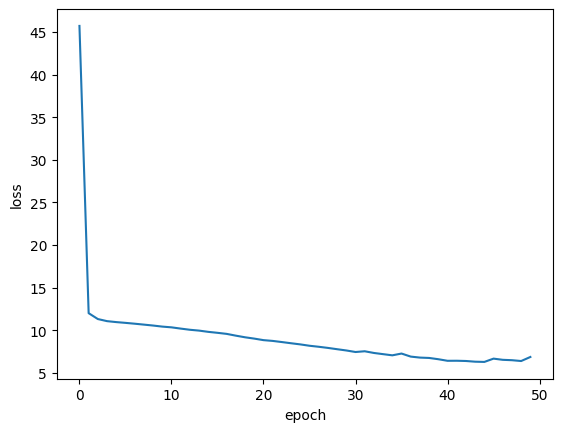

In [10]:
from graph import loss_graph, display_learning_curves

loss_graph(history.history['loss'])

In [11]:

knns = compute_knn(representation_leaner.encoder.predict(x_data), 512, kn)

I0000 00:00:1747732395.960789    2689 service.cc:152] XLA service 0x7f8e30050050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747732395.960978    2689 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-05-20 10:13:16.030925: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-20 10:13:17.323137: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1483', 204 bytes spill stores, 204 bytes spill loads

2025-05-20 10:13:17.412347: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1483_0', 396 bytes spill stores, 2300 bytes spill loads

2025-05-20 10:13:17.567107: 

  42/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step

I0000 00:00:1747732399.987172    2689 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step


100%|██████████| 117/117 [00:03<00:00, 29.29it/s]


In [12]:
knns

array([[  496, 37228, 56942, 36487, 50679],
       [  496, 37228, 56942, 36487, 50679],
       [  496, 37228, 56942, 36487, 50679],
       ...,
       [  496, 37228, 56942, 36487, 50679],
       [  496, 37228, 56942, 36487, 50679],
       [  496, 37228, 56942, 36487, 50679]], dtype=int32)

In [ ]:
projection = representation_leaner.predict(x_data)

1054/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step

In [14]:
projection

array([[0.03691027, 0.07831717, 0.24595025, ..., 0.31777924, 0.14659153,
        0.        ],
       [0.1706915 , 0.2880439 , 0.        , ..., 0.25182396, 0.2549668 ,
        0.1414891 ],
       [0.11327263, 0.18311065, 0.02306685, ..., 0.        , 0.3499329 ,
        0.6177944 ],
       ...,
       [0.08333093, 0.02657348, 0.19809024, ..., 0.02999599, 0.11697371,
        0.3170283 ],
       [0.15810871, 0.18329482, 0.1034442 , ..., 0.07579696, 0.11307222,
        0.25956184],
       [0.0849504 , 0.13365197, 0.07334644, ..., 0.04897243, 0.23461787,
        0.1964874 ]], dtype=float32)

In [15]:
knns.shape

(59904, 5)

In [16]:
knns

array([[14135, 27900, 32734, 57486, 27289],
       [14135, 27900, 32734, 57486, 27289],
       [14135, 27900, 32734, 57486, 27289],
       ...,
       [14135, 27900, 32734, 57486, 27289],
       [14135, 27900, 32734, 57486, 27289],
       [14135, 27900, 32734, 57486, 27289]], dtype=int32)

In [42]:

node_features = tf.constant(projection, dtype=tf.float32)


edge_sources = tf.constant(sources, dtype=tf.int32)
edge_targets = tf.constant(targets, dtype=tf.int32)


graph = tfgnn.GraphTensor.from_pieces(
    node_sets={
        "nodes": tfgnn.NodeSet.from_fields(
            sizes=[node_features.shape[0]],
            features={"feat": node_features}
        )
    },
    edge_sets={
        "edges": tfgnn.EdgeSet.from_fields(
            sizes=[edge_sources.shape[0]],
            adjacency=tfgnn.Adjacency.from_indices(
                source=("nodes", edge_sources),
                target=("nodes", edge_targets)
            )
        )
    }
)


In [38]:
import numpy as np
import tensorflow as tf
num_nodes = len(knns)

mask_ratio = 0.1
node_features = np.ones((num_nodes, 1), dtype=np.float32)
mask_indices = np.random.choice(num_nodes, int(mask_ratio * num_nodes), replace=False)

masked_features = node_features.copy()
masked_features[mask_indices] = 0

masked_features_tf = tf.constant(masked_features, dtype=tf.float32)
original_features_tf = tf.constant(node_features, dtype=tf.float32)

In [39]:
def masked_mse_loss(y_true, y_pred):
    mask = tf.constant(np.isin(np.arange(num_nodes), mask_indices), dtype=tf.bool)

    return tf.reduce_mean(tf.square(tf.boolean_mask(y_true, mask) - tf.boolean_mask(y_pred, mask)))


In [50]:

def build_gnn_model(graph_spec, hidden_dim):
    inputs = tf.keras.Input(type_spec=graph_spec)
    x = tfgnn.keras.layers.MapFeatures(node_sets_fn=lambda node_set, _: node_set['feat'])(inputs)
    for _ in range(2):
        x = GraphUpdate(
            node_sets={
                "nodes": SimpleConv(units=hidden_dim, receiver_tag=tfgnn.TARGET)
            }
        )(x)

    outputs = tfgnn.keras.layers.Pool()(x)
    return tf.keras.Model(inputs, outputs)

In [51]:
model = build_gnn_model(graph.spec, hidden_dim=128)

TypeError: Exception encountered when calling layer "map_features_3" (type MapFeatures).

build_gnn_model.<locals>.<lambda>() got an unexpected keyword argument 'node_set_name'

Call arguments received by layer "map_features_3" (type MapFeatures):
  • graph=GraphTensor(
  context=Context(features={}, sizes=Tensor("Placeholder:0", shape=(1,), dtype=int32), shape=(), indices_dtype=tf.int32),
  node_set_names=['nodes'],
  edge_set_names=['edges'])

In [ ]:
model.compile(
    optimizer='adam',
    loss=masked_mse_loss
)